In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
#transpose matrix to have sample as row, gene in column
full_matrix_transpose = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\datasets\full_matrix\matrix_logCPMrmBatch_20221207.csv", index_col=[0])
full_matrix = full_matrix_transpose.transpose()

In [4]:
# Take pam50 column from metadata and set as index of PCA dataframe
unsorted_metadata = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\datasets\Normalized expression data set\metadata\selected_metadat_20221128.csv")
full_matrix_pam50 = unsorted_metadata[('pam50')].to_list()
full_matrix['pam50'] = full_matrix_pam50
full_matrix.set_index('pam50', drop = True, inplace = True)
full_matrix = full_matrix.query('index != "Healthy"')

In [7]:
#PCA
pca = PCA(n_components=50)
principalComponents_full_matrix = pca.fit_transform(full_matrix)
principal_full_matrix = pd.DataFrame(data = principalComponents_full_matrix
             , columns = ["PC"+str(i) for i in range(1, 50+1)])
principal_full_matrix.shape

(1078, 50)

In [10]:
principal_full_matrix.index = full_matrix.index
principal_full_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
pam50,,,,,,,,,,,,,,,,,,,,,
LumA,-51.854422,-4.307317,27.521255,35.671773,-27.551089,-2.238634,-15.599514,-5.947460,-3.644558,-1.155327,...,19.610014,5.840753,12.357759,-3.319983,-7.042658,12.816347,-1.243215,-0.940960,10.073793,5.704796
LumA,-42.463558,-28.995077,4.474862,-9.409043,1.921301,5.818341,-9.840934,11.194842,5.888126,-44.651659,...,2.243624,0.169757,-16.127343,4.038765,15.892061,-9.485371,6.886515,-8.984534,7.977637,-17.767960
LumB,-43.094283,62.155433,-35.931512,51.339692,-37.665291,-33.673177,5.007878,31.685140,-1.487378,-9.369115,...,-12.295172,0.520066,7.145474,-14.740764,23.912904,14.051085,-0.520619,8.074901,1.782342,1.882072
Her2,32.862693,9.636477,-25.957506,-30.770836,-14.240612,17.677323,-5.504364,52.771377,-4.408916,-17.882882,...,-12.036865,6.089724,-11.944423,22.085058,6.385425,-4.771089,-7.003256,3.264371,9.058820,-3.068534
LumA,-12.913156,-1.264035,10.707117,-13.764167,-20.445480,-10.623927,0.294423,-3.224741,-24.651877,-13.426016,...,-12.953917,-7.777679,15.869449,-20.010138,-3.747498,16.673787,-8.405059,-2.683500,-2.817714,-1.937256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LumA,14.562729,-34.049556,-21.438245,-8.498747,24.089106,32.787853,26.325690,-2.703495,-33.622019,-20.536646,...,-12.276755,1.459341,9.300863,-0.383688,-0.787833,-5.117886,-7.953645,-13.438533,4.474110,-6.615006
Basal,94.223292,104.058234,29.979978,-4.212446,55.218974,21.463821,-40.638383,-1.635887,3.060526,-19.643327,...,-9.502917,-29.400641,-11.948559,9.690848,1.247324,-2.605489,-13.847889,8.414562,-2.128173,-12.545396
LumA,1.796461,-31.043521,6.178297,-17.244751,6.871164,-14.135787,-17.947328,3.991492,-29.938670,-20.214946,...,5.943329,6.082852,3.974644,4.977495,2.331289,17.264238,-4.606033,5.128006,-3.624422,-7.866159


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

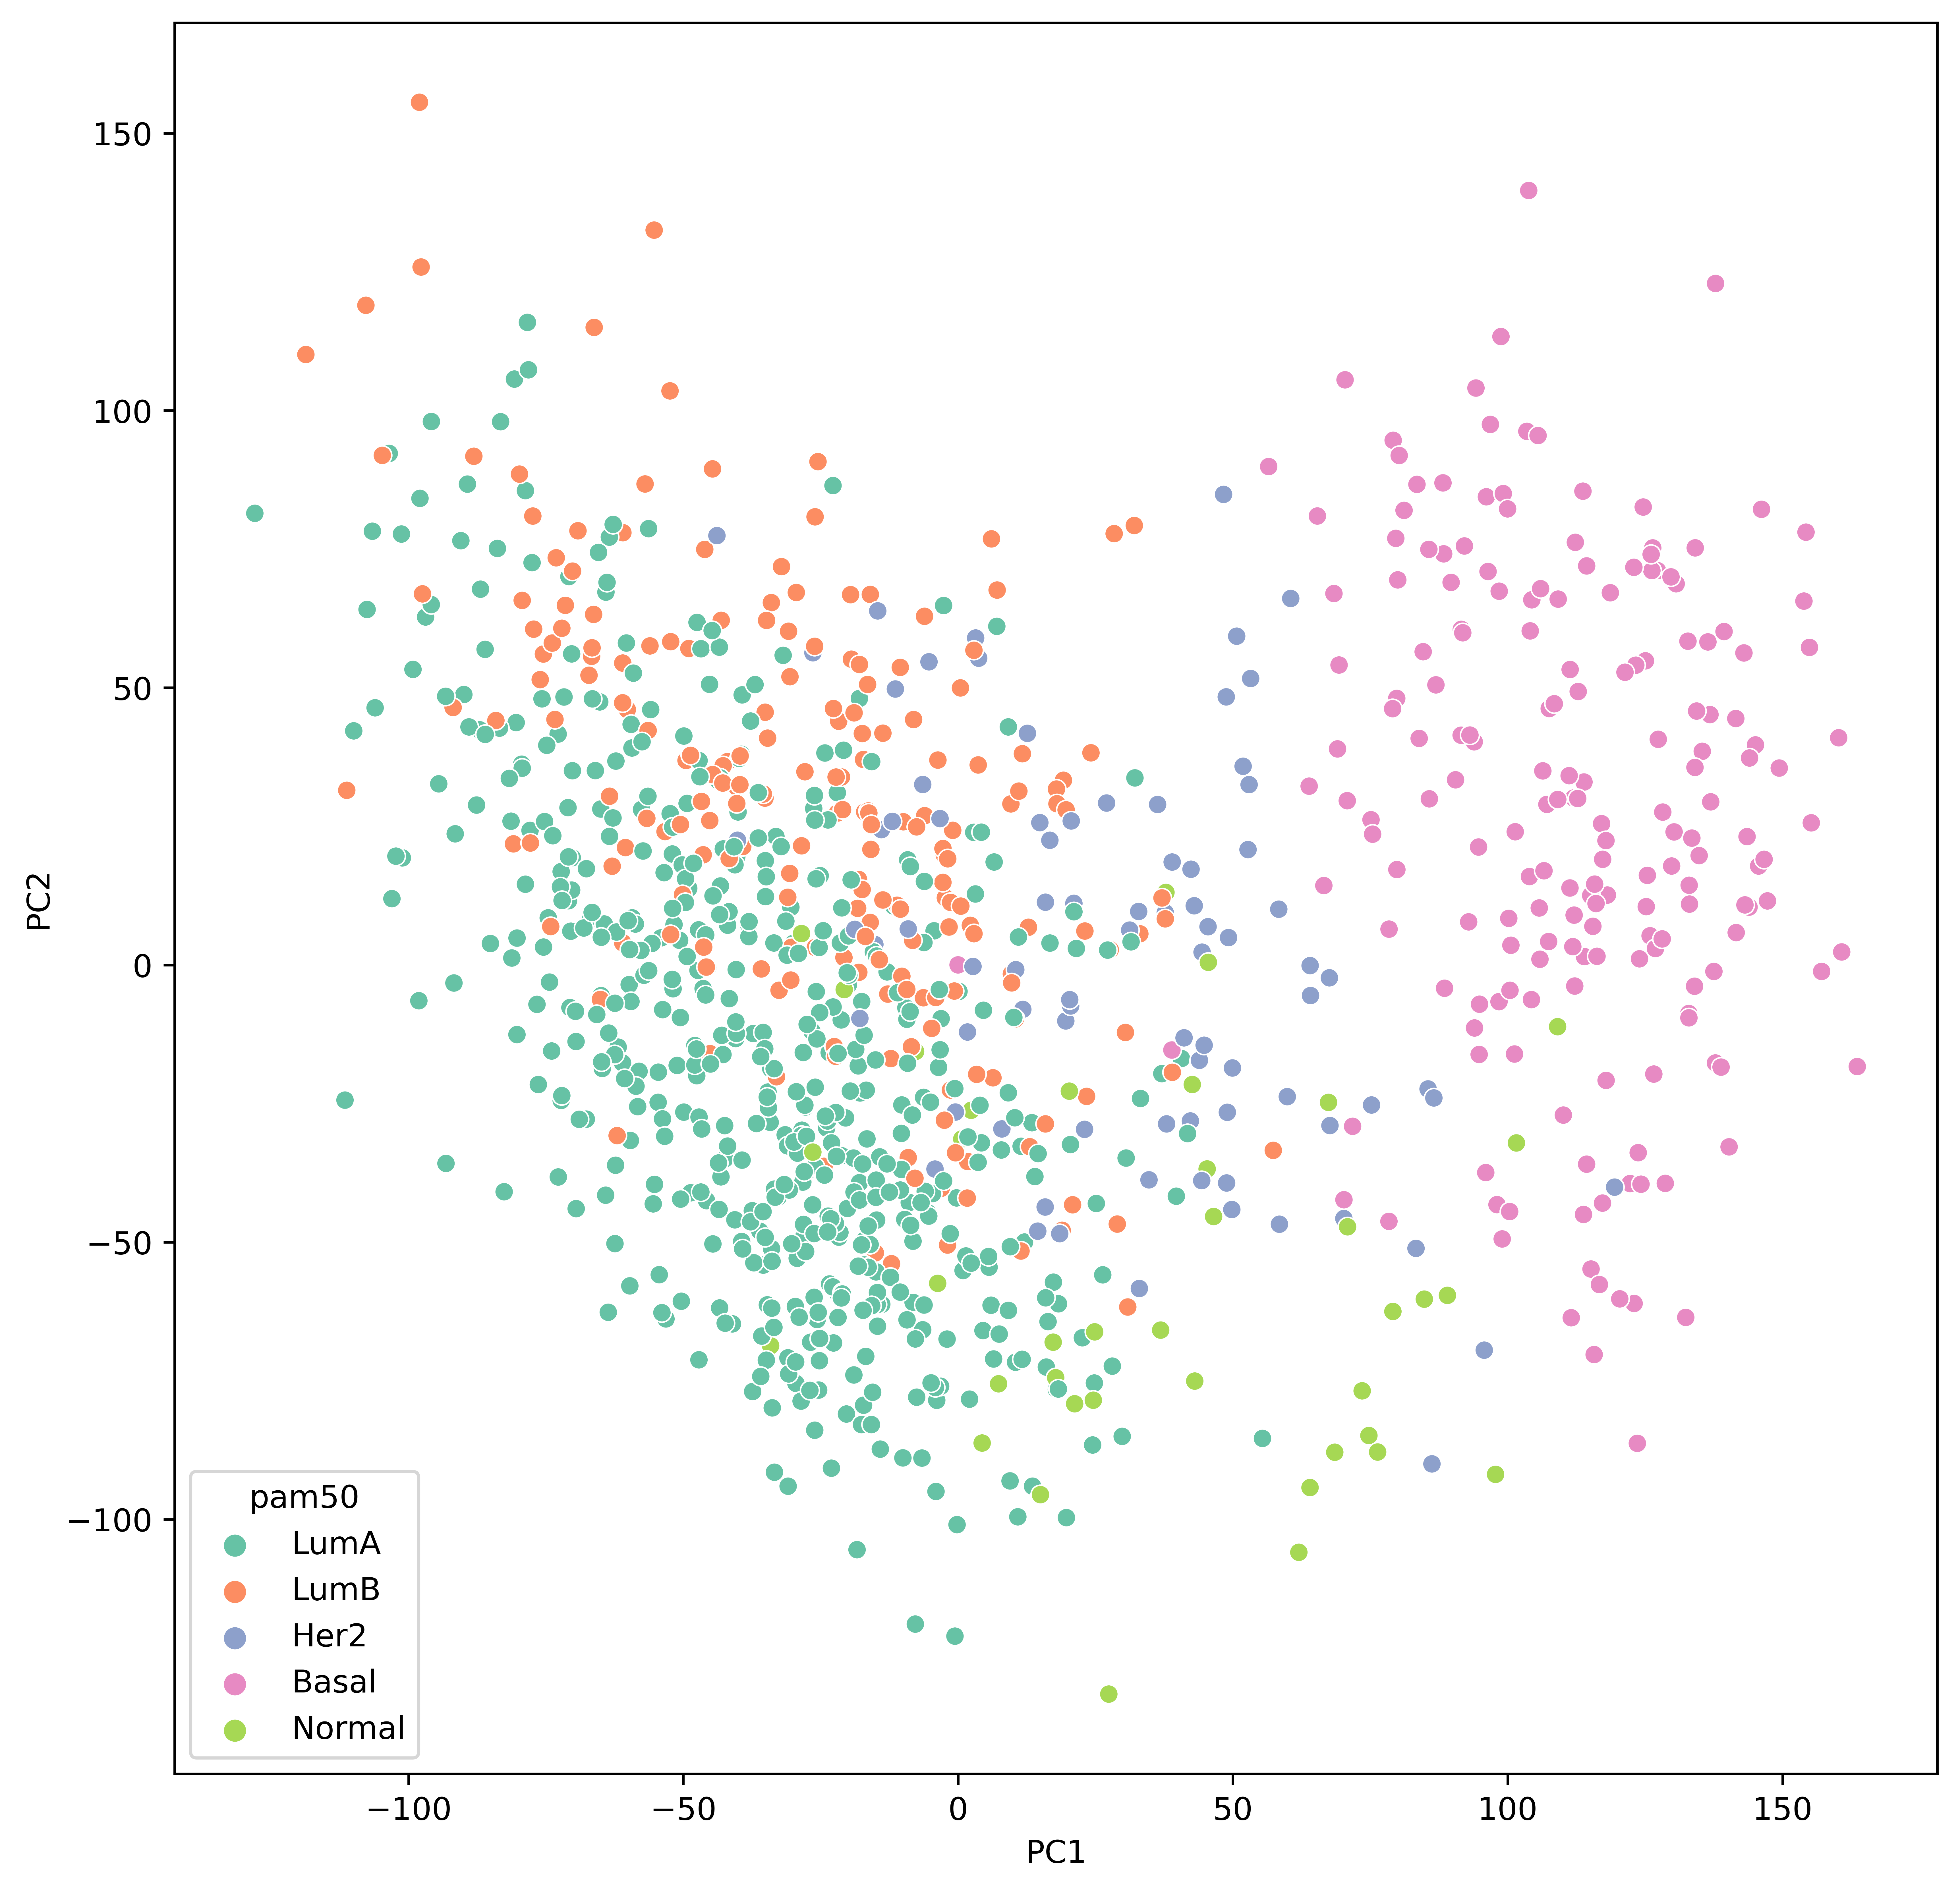

In [11]:
#formatting plot
fig,axes=plt.subplots(1,1,figsize=(10,10),dpi=800)
sns.scatterplot(ax=axes,x=principal_full_matrix['PC1'],y=principal_full_matrix['PC2'],hue=principal_full_matrix.index,palette='Set2')

Text(0, 0.5, 'explained variance (%)')

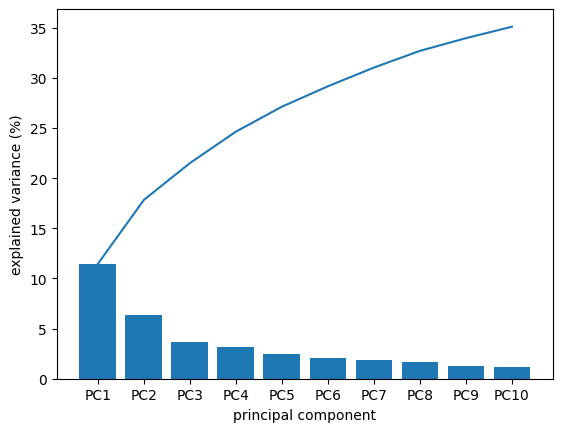

In [12]:
import matplotlib.pyplot as plt
#no. of PCs to be visualised
n = 10
#bar plot
plt.bar(x=principal_full_matrix.columns[:n], height = 100*pca.explained_variance_ratio_[:n])
#cumulative explained variance
cumulative = np.cumsum(100*pca.explained_variance_ratio_[:n])
plt.plot(principal_full_matrix.columns[:n], cumulative)
plt.xlabel('principal component')
plt.ylabel('explained variance (%)')

In [13]:
total=0;n=3
#cumulative explained variance for first n PCs
for var in pca.explained_variance_ratio_[:n]:
    total+= var
print(f'First {n} PC accounts for '+str('{0:.3g}'.format(100*total))+'% of variance')

First 3 PC accounts for 21.5% of variance


In [ ]:
#PC1, PC2 to plot
pca_df = principal_full_matrix.iloc[:,0:2].reset_index()
del pca_df['pam50']
display(pca_df.head())

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn import metrics

In [ ]:
#values for number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 12, 20, 40, 60]
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
inertia_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_df)        # fit model
    ss = metrics.silhouette_score(pca_df, kmeans_model.labels_)
    inertia = kmeans_model.inertia_
    # calculate silhouette_score
    silhouette_scores += [ss]    
    inertia_scores += [inertia] # store all the scores
    print('Parameter:', p, 'Silhouette Score', ss, ' Sum of squared distance', inertia)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(ax=axes[0],x=list(parameters),y=silhouette_scores,color='brown')
axes[0].set(xlabel='Number of Clusters', ylabel='Silhouette Score')
sns.barplot(ax=axes[1],x=list(parameters),y=inertia_scores,color='brown')
axes[1].set(xlabel='Number of Clusters', ylabel='Sum of squared distance')

In [ ]:
# fitting KMeans
kmeans_pca_3 = KMeans(n_clusters=3)
kmeans_pca_6 = KMeans(n_clusters=6)
kmeans_pca_8 = KMeans(n_clusters=8)

In [ ]:
import matplotlib.pyplot as plt
#get kmeans clustering label
label_3 = kmeans_pca_3.fit_predict(pca_df)
label_6 = kmeans_pca_6.fit_predict(pca_df)
label_8 = kmeans_pca_8.fit_predict(pca_df)
to_conc = [pca_df,pd.Series(label_3),pd.Series(label_6),pd.Series(label_8)]
#join with PCA dataframes
pca_df_label = pd.concat(to_conc,axis=1)

In [ ]:
#assign column names
pca_df_label.columns=['PC1','PC2','label_3','label_6','label_8']
pca_df_label.head()

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(24,6),dpi=800)
sns.scatterplot(ax=axes[0],x=pca_df_label['PC1'],y=pca_df_label['PC2'],hue=pca_df_label['label_3'],palette='Set2')
sns.scatterplot(ax=axes[1],x=pca_df_label['PC1'],y=pca_df_label['PC2'],hue=pca_df_label['label_6'],palette='Set2')
sns.scatterplot(ax=axes[2],x=pca_df_label['PC1'],y=pca_df_label['PC2'],hue=pca_df_label['label_8'],palette='Set2')

In [ ]:
df = pd.DataFrame(zip(full_matrix_pam50,pca_df_label['label_6']),columns=['pam50','label_6'])
confusion_matrix = pd.crosstab(df['label_6'], df['pam50'], rownames=['label_6'], colnames=['pam50'])
confusion_matrix = confusion_matrix[['Healthy','LumA','LumB','Her2','Basal','Normal']]
fig,axes=plt.subplots(1,1,figsize=(10,7.5),dpi=800)
sns.heatmap(confusion_matrix, annot=True,square=True,ax=axes,fmt='g')
plt.show()

In [ ]:
pca_df

In [ ]:
import umap
reducer = umap.UMAP(random_state=77)
#create df to apply umap to 
umap_input = full_matrix
#apply umap
reducer.fit(umap_input)

In [ ]:
embedding = reducer.transform(umap_input)
assert(np.all(embedding == reducer.embedding_))
embedding.shape

In [ ]:
umap_df=pd.DataFrame(embedding,columns=['UMAP_1','UMAP_2'])

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,10),dpi=800)
sns.scatterplot(x=umap_df['UMAP_1'],y=umap_df['UMAP_2'],hue=full_matrix_pam50,palette='Spectral')

In [ ]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 12, 20, 40, 60]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(umap_df)          # fit model
    ss = metrics.silhouette_score(umap_df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
# fitting KMeans
kmeans_umap_3 = KMeans(n_clusters=3)
kmeans_umap_6 = KMeans(n_clusters=6)
kmeans_umap_8 = KMeans(n_clusters=8)

In [ ]:
label_umap_3 = kmeans_umap_3.fit_predict(umap_df)
label_umap_6 = kmeans_umap_6.fit_predict(umap_df)
label_umap_8 = kmeans_umap_8.fit_predict(umap_df)
to_conc = [umap_df,pd.Series(label_umap_3),pd.Series(label_umap_6),pd.Series(label_umap_8)]
umap_labels = pd.concat(to_conc,axis=1)
umap_labels.columns=['UMAP_1','UMAP_2','label_3','label_6','label_8']

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(24,6),dpi=800)
sns.scatterplot(ax=axes[0],x=umap_labels['UMAP_1'],y=umap_labels['UMAP_2'],hue=umap_labels['label_3'],palette='Set2')
sns.scatterplot(ax=axes[1],x=umap_labels['UMAP_1'],y=umap_labels['UMAP_2'],hue=umap_labels['label_6'],palette='Set2')
sns.scatterplot(ax=axes[2],x=umap_labels['UMAP_1'],y=umap_labels['UMAP_2'],hue=umap_labels['label_8'],palette='Set2')

In [ ]:
df = pd.DataFrame(zip(full_matrix_pam50,umap_labels['label_6']),columns=['pam50','label_6'])
confusion_matrix = pd.crosstab(df['label_6'], df['pam50'], rownames=['label_6'], colnames=['pam50'])
confusion_matrix = confusion_matrix[['Healthy','LumA','LumB','Her2','Basal','Normal']]
fig,axes=plt.subplots(1,1,figsize=(10,6),dpi=800)
sns.heatmap(confusion_matrix, annot=True,square=True,ax=axes, fmt='g')
plt.show()

In [ ]:
#hierarchal clustering
from scipy.cluster.hierarchy import fcluster, linkage
distance_matrix = linkage(full_matrix, method = 'ward', metric = 'euclidean')
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Create a dendrogram
dn = dendrogram(distance_matrix)
plt.show()

In [ ]:
hierarchal_labels_3 = fcluster(distance_matrix, 3, criterion='maxclust')
hierarchal_labels_6 = fcluster(distance_matrix, 6, criterion='maxclust')
display(hierarchal_labels_3);display(hierarchal_labels_6)

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(24,6),dpi=800)
sns.scatterplot(ax=axes[0], x=pca_df['PC1'],y=pca_df['PC2'], hue=hierarchal_labels_3, legend= 'full',palette='Set2')
sns.scatterplot(ax=axes[1], x=pca_df['PC1'],y=pca_df['PC2'], hue=hierarchal_labels_6, legend= 'full',palette='Spectral')
sns.scatterplot(ax=axes[2], x=pca_df['PC1'],y=pca_df['PC2'], hue=full_matrix_pam50, legend= 'full',palette='Spectral')

In [ ]:
df = pd.DataFrame(zip(full_matrix_pam50,hierarchal_labels_6),columns=['pam50','label_6'])
confusion_matrix = pd.crosstab(df['label_6'], df['pam50'], rownames=['label_6'], colnames=['pam50'])
confusion_matrix = confusion_matrix[['Healthy','LumA','LumB','Her2','Basal','Normal']]
fig,axes=plt.subplots(1,1,figsize=(10,6),dpi=800)
sns.heatmap(confusion_matrix, annot=True,square=True,ax=axes, fmt='g')
plt.show()